#**Images Classification**

In this notebook, the loaded images would be for Skates, Shoes and Roller blades.
The purpose is to build a model using fastai.vision that can distinguish between those three objects.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#importing fastai.vision
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
#creating a directory to where the notebook will run
%cd /root/
!mkdir .fastai
%cd .fastai
!mkdir data
%cd data

/root
/root/.fastai
/root/.fastai/data


Download the data from github on you local machine.

In [4]:
#Uploading data
from google.colab import files
files.upload()

Saving SkatesShoesRollerblades.tgz to SkatesShoesRollerblades.tgz


In [6]:
#Untarring data
!tar xvzf SkatesShoesRollerblades.tgz

SkatesShoesRollerblades/
SkatesShoesRollerblades/train/
SkatesShoesRollerblades/train/Rollerblades/
SkatesShoesRollerblades/train/Rollerblades/image (1).png
SkatesShoesRollerblades/train/Rollerblades/image (10).png
SkatesShoesRollerblades/train/Rollerblades/image (11).png
SkatesShoesRollerblades/train/Rollerblades/image (12).png
SkatesShoesRollerblades/train/Rollerblades/image (13).png
SkatesShoesRollerblades/train/Rollerblades/image (14).png
SkatesShoesRollerblades/train/Rollerblades/image (15).png
SkatesShoesRollerblades/train/Rollerblades/image (16).png
SkatesShoesRollerblades/train/Rollerblades/image (17).png
SkatesShoesRollerblades/train/Rollerblades/image (18).png
SkatesShoesRollerblades/train/Rollerblades/image (19).png
SkatesShoesRollerblades/train/Rollerblades/image (2).png
SkatesShoesRollerblades/train/Rollerblades/image (20).png
SkatesShoesRollerblades/train/Rollerblades/image (21).png
SkatesShoesRollerblades/train/Rollerblades/image (22).png
SkatesShoesRollerblades/train/Ro

In [8]:
#Checking directory of untarred data
!ls

#Changing directory to the path which will be used
%cd SkatesShoesRollerblades
!ls

SkatesShoesRollerblades  SkatesShoesRollerblades.tgz
/root/.fastai/data/SkatesShoesRollerblades
train  valid


In [9]:
#Converting the path from string into PosixPath
from pathlib import Path
path = Path('/root/.fastai/data/SkatesShoesRollerblades')
path

PosixPath('/root/.fastai/data/SkatesShoesRollerblades')

In [0]:
#Loading data and normalizing it according to the pretrained data 'ImagnetNet
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224).normalize(imagenet_stats)

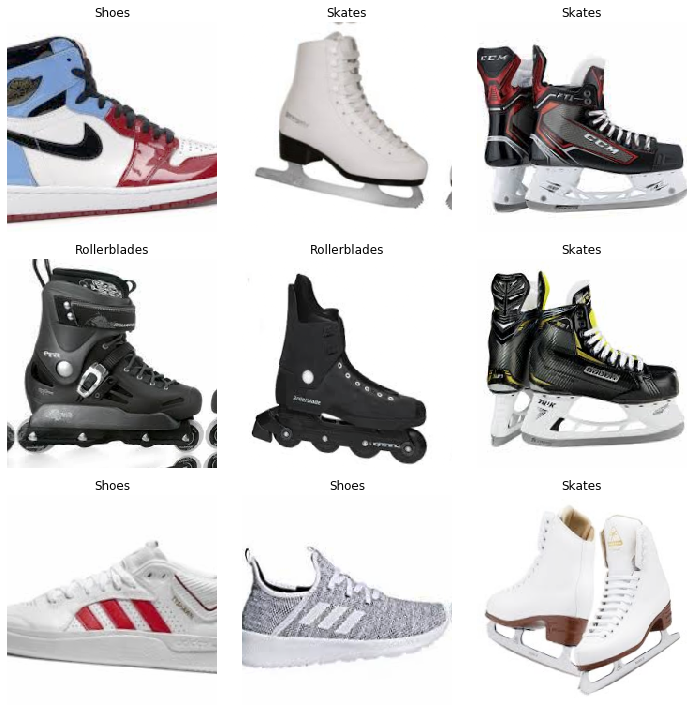

In [11]:
#taking a look on data
data.show_batch(rows=3, figsize=(10,10))

In [12]:
#importing pre-trained model resnet34
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 189MB/s]


In [13]:
#fitting model
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,2.012500,2.271754,0.678571,00:02
1,2.085638,1.718234,0.535714,00:01
2,1.873131,1.382666,0.500000,00:01
3,1.545525,0.984045,0.321429,00:01
4,1.265083,0.758019,0.250000,00:01
5,1.053297,0.636087,0.250000,00:01
6,0.895140,0.597722,0.178571,00:01
7,0.778821,0.605749,0.178571,00:01
8,0.686279,0.619429,0.142857,00:01
9,0.611697,0.643307,0.178571,00:01


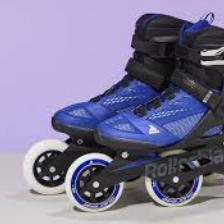

In [14]:
img = learn.data.train_ds[25][0]
img

In [15]:
learn.predict(img)

(Category Rollerblades,
 tensor(0),
 tensor([1.0000e+00, 4.7816e-09, 3.4317e-10]))

In [16]:
#Interpreting what confuses our model the most
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()

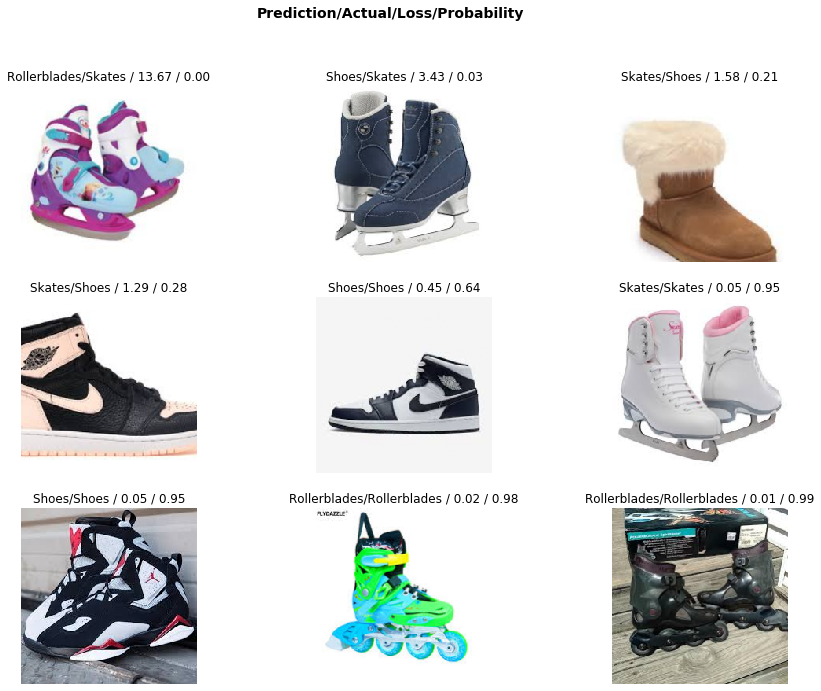

In [17]:
#Looking at the first row, it seems that the Skates get confused with the Shoes
interp.plot_top_losses(9, figsize=(15, 11))

In [0]:
interp.most_confused(min_val=2)

[('Skates', 'Shoes', 2)]